In [11]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [15]:
data_train = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2013_gezi/train.csv')

In [16]:
data_train.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,0,10k yellow gold blue colored. blue cluster col...,0.040000,0.000000,Neutral
1,1,14k yellow/white gold 0.04 ct. diamond 7 004 d...,0.000000,0.000000,Neutral
2,2,stop 3qt red sand scoop{ special } free shovel...,0.457143,0.252381,Positive
3,3,"solid report claims iphone 5s available gold, ...",0.318182,0.178788,Positive
4,4,gold boss chain necklace fashion accessories shop,0.000000,0.000000,Neutral


In [17]:
data_test = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2013_gezi/test.csv')

In [18]:
data_test.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,17000,"gold marked 50.00inr lower sharps pixley 29,95...",0.600000,0.100000,Positive
1,17001,silver gold – new divergence? gold goldprice,0.454545,0.136364,Positive
2,17002,silver gold – new divergence? gold goldprice,0.454545,0.136364,Positive
3,17003,silver gold – new divergence? gold goldprice,0.454545,0.136364,Positive
4,17004,"gold fix rate usd: 1,375.25 gbp: 878.47 eur: 1...",0.000000,0.000000,Neutral


In [19]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [20]:
X_train = data_train.tweet.values.astype(str).tolist()
y_train = data_train.Analysis.values.astype(str).tolist()

X_test = data_test.tweet.values.astype(str).tolist()
y_test = data_test.Analysis.values.astype(str).tolist()

In [21]:
len(X_train), len(X_test)

(17000, 5254)

In [22]:
# Building model with transformer
model_name = 'roberta-base'

trans = text.Transformer(model_name, maxlen=128)

In [23]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 10
	95percentile : 16
	99percentile : 21


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 11
	95percentile : 16
	99percentile : 18


In [24]:
# getting roberta-base model.
model = trans.get_classifier() # AUC(name='auc') from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, matthews_corrcoef, roc_curve, auc, roc_auc_score


In [25]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 8)

In [26]:

#history = learner.fit_onecycle(1e-5, 3)
history = learner.autofit(1e-5, 5)



begin training using triangular learning rate policy with max lr of 1e-05...
Epoch 1/5
2125/2125 [==============================] - 546s 247ms/step - loss: 0.2828 - accuracy: 0.8916 - val_loss: 0.9141 - val_accuracy: 0.8000
Epoch 2/5
2125/2125 [==============================] - 531s 249ms/step - loss: 0.0369 - accuracy: 0.9896 - val_loss: 0.9404 - val_accuracy: 0.8002
Epoch 3/5
2125/2125 [==============================] - 531s 249ms/step - loss: 0.0252 - accuracy: 0.9938 - val_loss: 0.8429 - val_accuracy: 0.8175
Epoch 4/5
2125/2125 [==============================] - 529s 248ms/step - loss: 0.0134 - accuracy: 0.9969 - val_loss: 0.7636 - val_accuracy: 0.8632
Epoch 5/5
2125/2125 [==============================] - 528s 247ms/step - loss: 0.0135 - accuracy: 0.9968 - val_loss: 0.8576 - val_accuracy: 0.8736


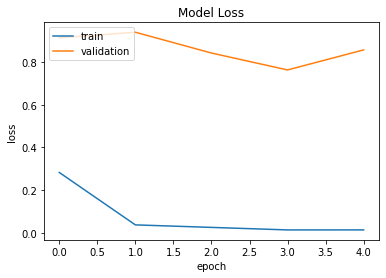

In [27]:
learner.plot('loss')

In [28]:
learner.validate()

165/165 [==============================] - 28s 151ms/step
              precision    recall  f1-score   support

           0       0.91      0.48      0.63       918
           1       0.88      0.98      0.93      2953
           2       0.85      0.91      0.88      1383

    accuracy                           0.87      5254
   macro avg       0.88      0.79      0.81      5254
weighted avg       0.88      0.87      0.86      5254



array([[ 442,  321,  155],
       [   0, 2890,   63],
       [  46,   79, 1258]])

In [29]:
y_pred = predictor.predict(X_test)

NameError: ignored